<a href="https://colab.research.google.com/github/vaibhav251999/Projects/blob/main/insaid_internship_selection_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV') 

In [ ]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.nunique().sort_values(ascending=True)

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64

In [ ]:
Y_colname= 'isFraud'
X_colname = [feature for feature in data.columns if feature not in [Y_colname]]

In [ ]:
X_colname

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud']

In [ ]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
# as we can see there are  no null values in the columns newbalanceDest and isFraud

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


As we noticed that mean of isfraud column is 0.001 which basicaly indicates there is highly unballanced data, Also theoratical studies suggest that its not surprising to have less fraud transactions than a genunie transactions

lets just see our belief visualy

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


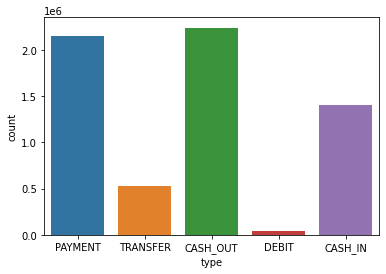

In [ ]:
sns.countplot(data['type'])

In [ ]:
data.groupby(['isFraud', 'type']).size().unstack(fill_value=0)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


we can notice that when the transaction is fraud thre is no CASH_IN(which is very obvious) ,debit, and payment

In [ ]:
data.info() # checking for categorical data or non-numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


as nameOrig is nothing but name/ID so which might cause a spurious correaltion (as it is irrelevent with our target) so better to remove this column

In [ ]:
data.drop('nameOrig',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


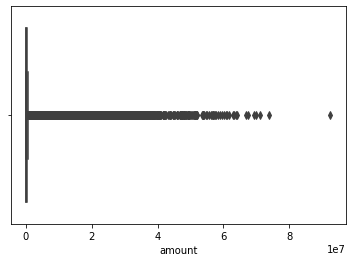

In [ ]:
import seaborn as sns
sns.boxplot(data['amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

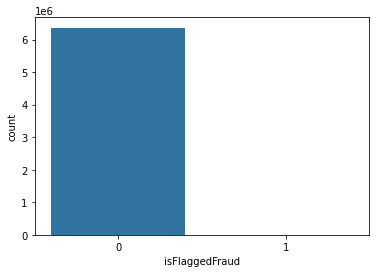

In [ ]:
sns.countplot(data['isFlaggedFraud'])
data['isFlaggedFraud'].value_counts()

as we can npotice this column is kind of very unballanced and therefore it might be irrelevant 

In [ ]:
from scipy.stats import zscore
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
data[np.abs(zscore(data['amount'])) < 3][Y_colname].value_counts()

0    6311148
1       6527
Name: isFraud, dtype: int64

In [ ]:
# which means that there are outliers  but we cannot remove those as they are suffiently large in isfroud=1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


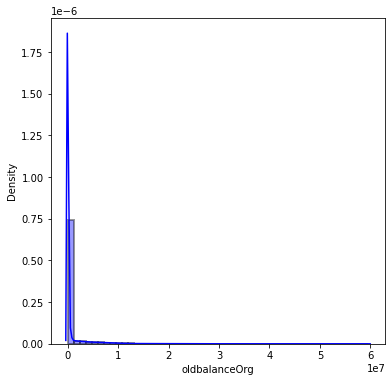

In [ ]:
plt.figure(figsize=[6, 6])
sns.distplot(data['oldbalanceOrg'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


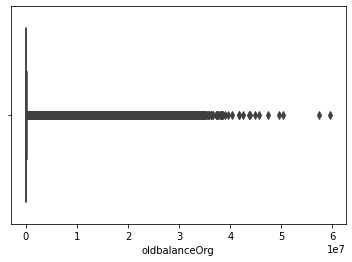

In [ ]:
sns.boxplot(data['oldbalanceOrg'])

In [ ]:
data['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

In [ ]:
data[Y_colname].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
data[np.abs(zscore(data['oldbalanceOrg'])) < 3][Y_colname].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [ ]:
print('outliers data shape:',data[np.abs(zscore(data['oldbalanceOrg'])) < 3].shape)
print('original data shape:',data.shape)


outliers data shape: (6207480, 10)
original data shape: (6362620, 10)


In [ ]:
data = data[np.abs(zscore(data['oldbalanceOrg'])) < 3] #  removing the outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


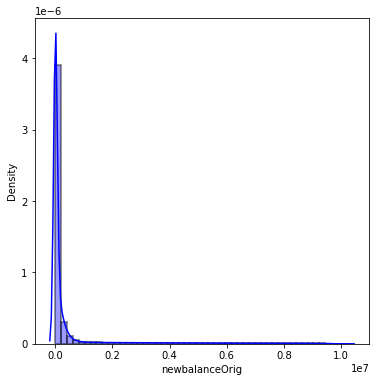

In [ ]:
plt.figure(figsize=[6, 6])
sns.distplot(data['newbalanceOrig'], color='b', hist_kws=dict(edgecolor='black', linewidth=2), bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


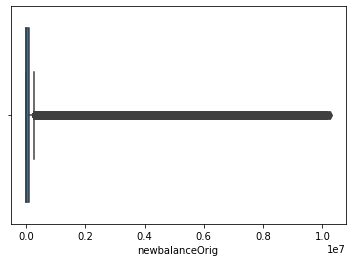

In [ ]:
sns.boxplot(data['newbalanceOrig'])

In [ ]:
data[Y_colname].value_counts()

0    6199579
1       7901
Name: isFraud, dtype: int64

In [ ]:
data[np.abs(zscore(data['newbalanceOrig'])) < 3][Y_colname].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

In [ ]:
print('outliers data shape:',data[np.abs(zscore(data['newbalanceOrig'])) < 3].shape)
print('original data shape:',data.shape)

outliers data shape: (5977751, 10)
original data shape: (6207480, 10)


In [ ]:
data = data[np.abs(zscore(data['newbalanceOrig'])) < 3] #  removing the outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


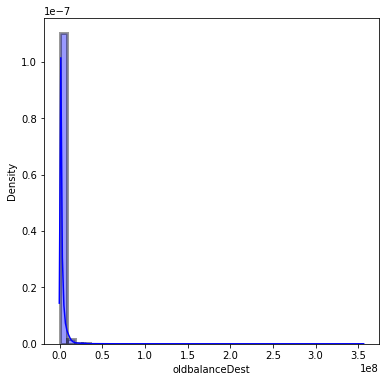

In [ ]:
plt.figure(figsize=[6, 6])
sns.distplot(data['oldbalanceDest'], color = 'b', hist_kws=dict(edgecolor='black', linewidth=3), bins=40)

In [ ]:
data.loc[data['nameDest'].str.startswith('M')]

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [ ]:
data.loc[~data['nameDest'].str.startswith('M')]['oldbalanceDest'].describe()

count    3.826402e+06
mean     1.632251e+06
std      4.071666e+06
min      0.000000e+00
25%      1.165770e+05
50%      5.218018e+05
75%      1.650417e+06
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

In [ ]:
data.loc[~data['nameDest'].str.startswith('M')]['newbalanceDest'].describe()

count    3.826402e+06
mean     1.853100e+06
std      4.423903e+06
min      0.000000e+00
25%      2.242694e+05
50%      6.858243e+05
75%      1.908355e+06
max      3.561793e+08
Name: newbalanceDest, dtype: float64

In [ ]:
# setting up the mdeian value  for oldbalanceDest
med_oldbalanceDest = data[~data['nameDest'].str.startswith('M')]['oldbalanceDest'].median()
data.loc[data['nameDest'].str.startswith('M'), 'oldbalanceDest'] = med_oldbalanceDest    

# setting up the mdeian value  for newbalanceDest
med_newbalanceDest = data[~data['nameDest'].str.startswith('M')]['newbalanceDest'].median()
data.loc[data['nameDest'].str.startswith('M'), 'newbalanceDest'] = med_newbalanceDest

In [ ]:
data['isFlaggedFraud'].value_counts()

0    5977743
1          8
Name: isFlaggedFraud, dtype: int64

In [ ]:
# which says it might be irrelevent as it is very much imballanced 
# so better if we drop that column
data.drop('isFlaggedFraud',axis=1,inplace=True)


In [ ]:
display(data.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06,5.977751e+06
mean,2.435811e+02,1.804237e+05,2.148974e+05,2.275171e+05,1.232609e+06,1.433006e+06,1.321400e-03
std,1.424990e+02,6.181132e+05,6.811729e+05,7.142910e+05,3.300919e+06,3.583486e+06,3.632704e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.244322e+04,0.000000e+00,0.000000e+00,3.098470e+05,4.393596e+05,0.000000e+00
50%,2.390000e+02,6.839515e+04,1.091000e+04,0.000000e+00,5.218018e+05,6.858243e+05,0.000000e+00
75%,3.350000e+02,2.064838e+05,7.212165e+04,8.192764e+04,8.568732e+05,1.057022e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,9.468064e+06,4.916134e+06,3.560159e+08,3.561793e+08,1.000000e+00


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
print('costomer ID starting with C ',data['nameDest'].str.startswith('C').value_counts())
print('costomer ID starting with M ',data['nameDest'].str.startswith('M').value_counts())


costomer ID starting with C  True     3826402
False    2151349
Name: nameDest, dtype: int64
costomer ID starting with M  False    3826402
True     2151349
Name: nameDest, dtype: int64


In [ ]:
data[data['nameDest'].str.startswith('C') & data[Y_colname] == 1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,C38997010,21182.00,0.00,1
251,1,TRANSFER,2806.00,2806.00,0.0,C972765878,0.00,0.00,1
252,1,CASH_OUT,2806.00,2806.00,0.0,C1007251739,26202.00,0.00,1
680,1,TRANSFER,20128.00,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,C2080388513,0.00,0.00,1


In [ ]:
data[Y_colname].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

as we can see that nameDest starting with C having fraud transactions have 7899 rows and also total no. of fraud is 7899 . it hnts all the fraud has nameDest starting  with C 

In [ ]:
data['nameDest_startswith_C'] = data['nameDest'].str.startswith('C') # creating a new column 

In [ ]:
data['nameDest_startswith_C'].value_counts()

True     3826402
False    2151349
Name: nameDest_startswith_C, dtype: int64

In [ ]:
data.groupby([Y_colname, 'nameDest_startswith_C']).size().unstack() 
# relation between the new column starting with c and isFraud

nameDest_startswith_C,False,True
isFraud,,
0,2151349.0,3818503.0
1,NaN,7899.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data[['nameDest_startswith_C']] = OrdinalEncoder(categories=[[False, True]]).fit_transform(data[['nameDest_startswith_C']])

In [ ]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [ ]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,nameDest_startswith_C,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,M1979787155,521801.835,685824.345,0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,M2044282225,521801.835,685824.345,0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,C553264065,0.000,0.000,1,1.0,0,0,0,1
3,1,181.00,181.0,0.00,C38997010,21182.000,0.000,1,1.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,M1230701703,521801.835,685824.345,0,0.0,0,0,1,0


In [ ]:
data.shape

(5977751, 13)

In [ ]:
# so we have 13 columns now all numerical except the nameDest

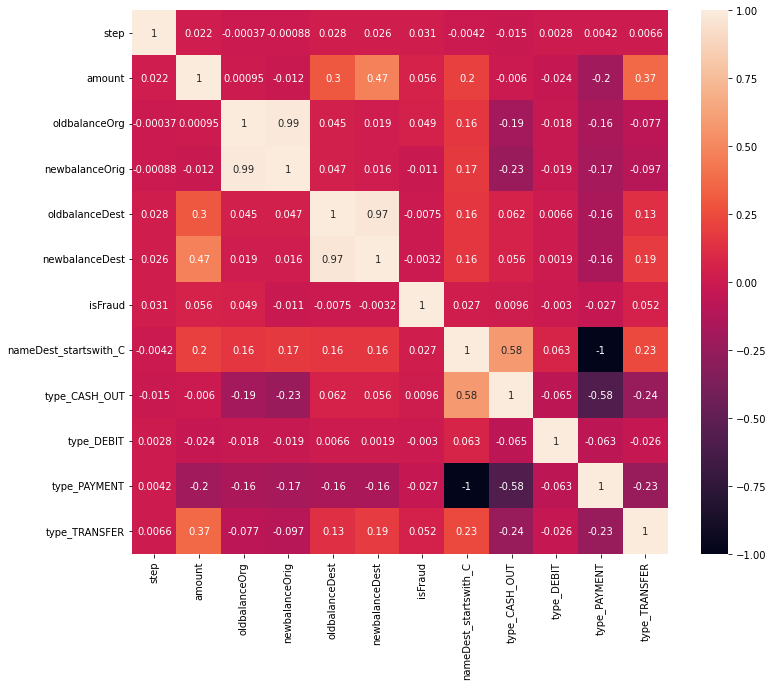

In [ ]:
plt.figure(figsize=[12, 10])

sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

**As the earlier results show that there were no type cash out , debit or payment in  fraud transactions,aslo this correlation shows that there are no corrlation between all these and isfraud as valuse is near to 0 , So we can drop those columns**

In [ ]:
data = data.drop(['type_DEBIT','type_CASH_OUT', 'type_PAYMENT'], axis=1) 

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop([Y_colname], axis=1)
y = data[Y_colname]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state=102)
X_train.reset_index(drop=True, inplace=True)

print('Original dataset size : ({}, {})'.format(data.shape[0], data.shape[1]))
print('Training set size : ({}, {})'.format(X_train.shape[0], X_train.shape[1]))
print('Testing set size: ({}, {})'.format(X_test.shape[0], X_test.shape[1]))

Original dataset size : (5977751, 10)
Training set size : (5738640, 9)
Testing set size: (239111, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.fit_transform(X_train.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_train_std = pd.DataFrame(X_train, columns=X_train.columns)
display(X_train_std.describe())

X_test[['step', 'amount', 'oldbalanceOrg'
         , 'newbalanceOrig', 'oldbalanceDest',
         'newbalanceDest']] = std.transform(X_test.loc[:, ['step',
                                              'amount',
                                              'oldbalanceOrg',
                                              'newbalanceOrig',
                                              'oldbalanceDest',
                                              'newbalanceDest']])
X_test_std = pd.DataFrame(X_test, columns=X_train.columns)
display(X_test_std.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,nameDest_startswith_C,type_TRANSFER
count,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06,5.738640e+06
mean,-3.526626e-16,-5.118799e-18,-9.096512e-15,1.410480e-14,-5.614020e-15,6.073187e-16,6.400187e-01,8.914168e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.799946e-01,2.849482e-01
min,-1.702347e+00,-2.925249e-01,-3.155147e-01,-3.185448e-01,-3.730533e-01,-3.995652e-01,0.000000e+00,0.000000e+00
25%,-6.146089e-01,-2.723522e-01,-3.155147e-01,-3.185448e-01,-2.792588e-01,-2.770271e-01,0.000000e+00,0.000000e+00
50%,-3.214276e-02,-1.816312e-01,-2.994946e-01,-3.185448e-01,-2.151340e-01,-2.083282e-01,1.000000e+00,0.000000e+00
75%,6.415530e-01,4.232044e-02,-2.096066e-01,-2.038033e-01,-1.137497e-01,-1.048487e-01,1.000000e+00,0.000000e+00
max,3.504760e+00,1.496522e+02,1.358351e+01,6.563850e+00,1.073724e+02,9.891835e+01,1.000000e+00,1.000000e+00


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,nameDest_startswith_C,type_TRANSFER
count,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000,239111.000000
mean,0.000142,0.002963,-0.001184,-0.000743,-0.000345,0.000444,0.642233,0.088570
std,1.000261,1.062301,0.998885,0.999483,0.974633,0.980523,0.479344,0.284122
min,-1.702347,-0.292524,-0.315515,-0.318545,-0.373053,-0.399565,0.000000,0.000000
25%,-0.614609,-0.272112,-0.315515,-0.318545,-0.279860,-0.277527,0.000000,0.000000
50%,-0.032143,-0.180632,-0.299587,-0.318545,-0.215134,-0.208328,1.000000,0.000000
75%,0.641553,0.043860,-0.210842,-0.205121,-0.113138,-0.104141,1.000000,0.000000
max,3.497742,103.267575,12.945962,6.563760,82.976206,76.359367,1.000000,1.000000


In [ ]:
y_train_ = y_train.values
y_test_ = y_test.values

In [ ]:
X_train_std.shape

(5738640, 9)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight(class_weight='balanced', classes=[0, 1], y = y_train_)

array([  0.50066122, 378.58820425])

In [ ]:
#removing the nameDest column
X_train_std = X_train_std.drop(['nameDest'], axis=1)
X_test_std=X_test_std.drop(['nameDest'], axis=1)

In [ ]:
X_train_std.head(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,nameDest_startswith_C,type_TRANSFER
0,1.897715,8.777269,-0.237056,-0.318545,1.745864,3.111954,1.0,1
1,-0.754962,-0.252930,-0.315515,-0.318545,-0.215134,-0.208328,0.0,0
2,-0.565485,-0.269462,-0.315515,-0.318545,-0.215134,-0.208328,0.0,0


**As all features are now numerical we are ready to fit before that we need check if our data is balanced or not **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


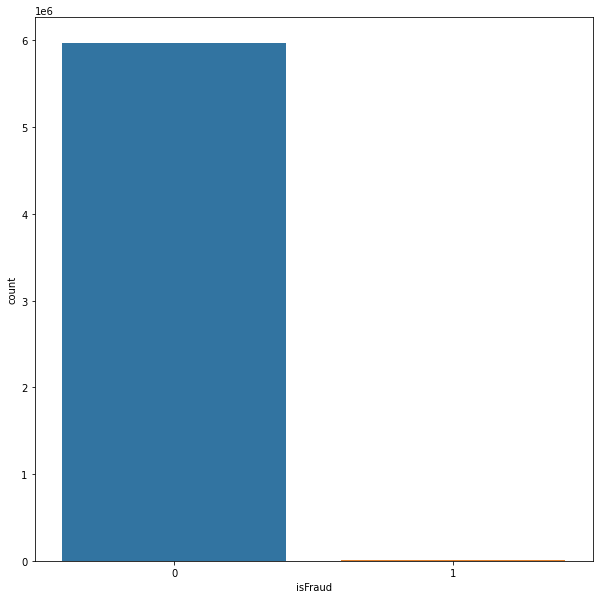

In [ ]:
import seaborn as sns
plt.figure(figsize=[10,10 ])
sns.countplot(data['isFraud'])

In [ ]:
data['isFraud'].value_counts()

0    5969852
1       7899
Name: isFraud, dtype: int64

  we can notice a highly imbalanced data clearly

 ## **possible solutions of dealing with imbalanced data**

 1.data replication

 2.random under sampling

 3.random over sampling 

 4.NearMiss

 5.synthetic Minority Oversampling Technique(SMOTE)

 6.under sampling :tomek links (majority voting type)

we will try a combination of **tomek links** and **SMOTE**

as the number of data for fraud is very less so undersampling can couse a huge loss of information and in oversampling can cause overfishing

As tomek links is kind of moderate undersampling and SMOTE is kind of oversampling 

In [ ]:
# load library
from imblearn.under_sampling import TomekLinks
import pandas as pd

mod = TomekLinks(sampling_strategy='majority')
x_train_tomek, y_train_tomek=mod.fit_resample(X_train_std, y_train_)

print('Original dataset shape:', len(X_train_std))
print('Resample dataset shape:', len(x_train_tomek))

Original dataset shape: 5738640
Resample dataset shape: 5737894


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x_train_tomek,y_train_tomek)

print('Origianl dataset shape:', Counter(y_train_tomek))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 5730315, 1: 7579})
Resampple dataset shape: Counter({0: 5730315, 1: 5730315})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=4, class_weight='balanced', n_jobs=-1)
model1.fit(x_smote, y_smote)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=4, n_jobs=-1)

In [ ]:
print(x_smote.shape)
print(y_smote.shape)
print(X_test_std.shape)
print(y_test_.shape)


(11460630, 8)
(11460630,)
(239111, 8)
(239111,)


In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = model1.predict(x_smote)
pred2 = model1.predict(X_test_std)

print(f1_score(y_smote, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_smote, pred1))
print(classification_report(y_test_, pred2))

0.9998085962111123
0.6947608200455581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5730315
           1       1.00      1.00      1.00   5730315

    accuracy                           1.00  11460630
   macro avg       1.00      1.00      1.00  11460630
weighted avg       1.00      1.00      1.00  11460630

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238791
           1       0.55      0.95      0.69       320

    accuracy                           1.00    239111
   macro avg       0.77      0.98      0.85    239111
weighted avg       1.00      1.00      1.00    239111



In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train_tomek, y_train_tomek)


[05:24:17] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier()

In [ ]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(x_train_tomek)
pred2 = model.predict(X_test_std)

print(f1_score(y_train_tomek, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_tomek, pred1))
print(classification_report(y_test_, pred2))

0.8116234017822549
0.7879924953095685
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5730315
           1       0.98      0.69      0.81      7579

    accuracy                           1.00   5737894
   macro avg       0.99      0.85      0.91   5737894
weighted avg       1.00      1.00      1.00   5737894

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238791
           1       0.99      0.66      0.79       320

    accuracy                           1.00    239111
   macro avg       0.99      0.83      0.89    239111
weighted avg       1.00      1.00      1.00    239111



In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_std,y_train_)
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train_std)
pred2 = model.predict(X_test_std)

print(f1_score(y_train_, pred1))
print(f1_score(y_test_, pred2))

print(classification_report(y_train_, pred1))
print(classification_report(y_test_, pred2))

[06:19:09] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.8164747701105016
0.793233082706767
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5731061
           1       0.99      0.70      0.82      7579

    accuracy                           1.00   5738640
   macro avg       0.99      0.85      0.91   5738640
weighted avg       1.00      1.00      1.00   5738640

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    238791
           1       1.00      0.66      0.79       320

    accuracy                           1.00    239111
   macro avg       1.00      0.83      0.90    239111
weighted avg       1.00      1.00      1.00    239111



In [1]:
import numpy as np
a=np.array([1,2,3])

In [2]:
a.sum()

6

In [3]:
sum(a)

6

In [4]:
s=0
for i in a:
  s=s+i
print(s)

6
